<a href="https://colab.research.google.com/github/harsh8097/Machine-Learning/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
from sklearn.datasets import load_iris

In [15]:
dataset = load_iris()

In [16]:
print(dataset)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [17]:

print(dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [18]:
df=sns.load_dataset('iris')

In [19]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [20]:
dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [21]:
X=df.iloc[:,:-1]

In [23]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [24]:
Y=dataset.target

In [25]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [26]:
from sklearn.model_selection import train_test_split

In [28]:
x_train , x_test , y_train , y_test =train_test_split(X,Y ,test_size=0.33 , random_state=23)

In [30]:
x_train.shape

(100, 4)

In [31]:
x_test.shape

(50, 4)

In [32]:
y_train.shape

(100,)

In [33]:
y_test.shape

(50,)

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
# to create a tree

model= DecisionTreeClassifier()

In [36]:
model

DecisionTreeClassifier()

In [37]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

[Text(0.4, 0.9166666666666666, 'x[2] <= 2.35\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.3, 0.75, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.35, 0.8333333333333333, 'True  '),
 Text(0.5, 0.75, 'x[2] <= 4.85\ngini = 0.5\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.45, 0.8333333333333333, '  False'),
 Text(0.2, 0.5833333333333334, 'x[3] <= 1.7\ngini = 0.059\nsamples = 33\nvalue = [0, 32, 1]'),
 Text(0.1, 0.4166666666666667, 'gini = 0.0\nsamples = 31\nvalue = [0, 31, 0]'),
 Text(0.3, 0.4166666666666667, 'x[1] <= 3.1\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.2, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.4, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.5833333333333334, 'x[3] <= 1.75\ngini = 0.153\nsamples = 36\nvalue = [0, 3, 33]'),
 Text(0.7, 0.4166666666666667, 'x[2] <= 5.35\ngini = 0.5\nsamples = 6\nvalue = [0, 3, 3]'),
 Text(0.6, 0.25, 'x[1] <= 2.35\ngini = 0.375\nsamples = 4\nvalue = [0, 3, 1]'),
 Text

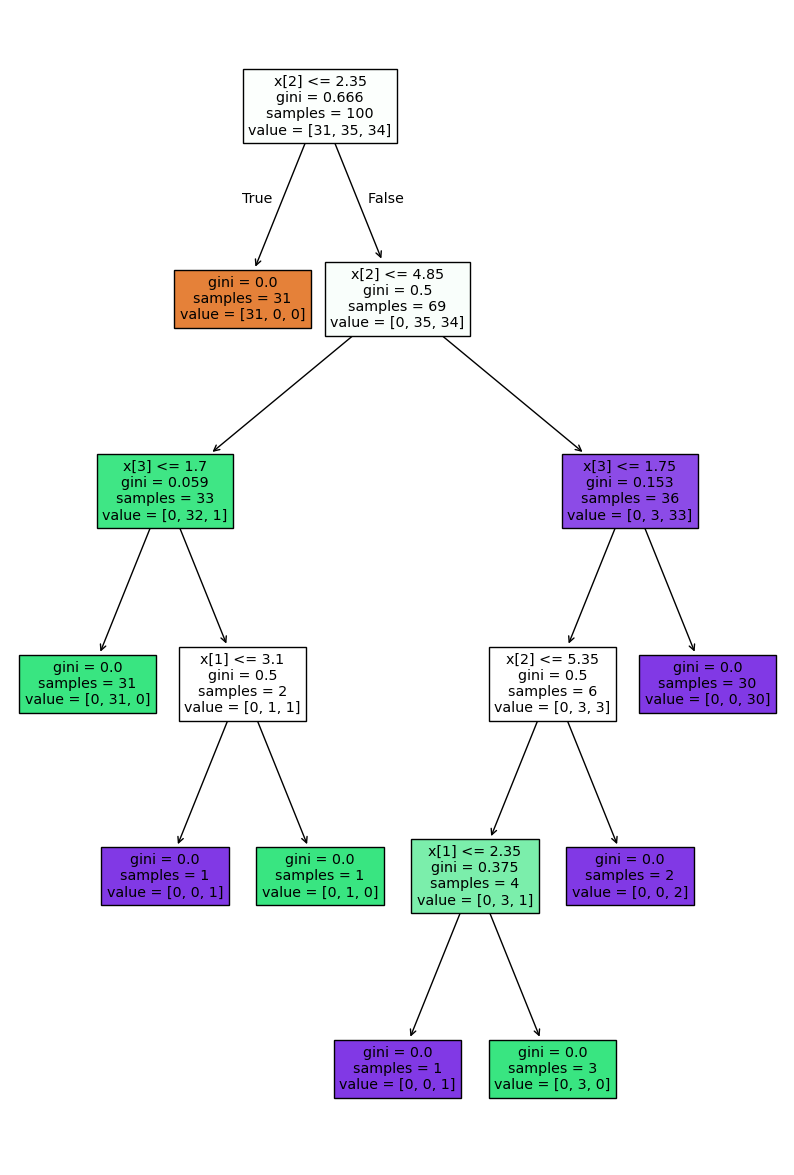

In [39]:
from sklearn import  tree
plt.figure(figsize=(10,15))
tree.plot_tree(model , filled=True)

In [42]:
# post pruning

model=DecisionTreeClassifier(max_depth=2)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'x[2] <= 2.35\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[2] <= 4.85\ngini = 0.5\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.059\nsamples = 33\nvalue = [0, 32, 1]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.153\nsamples = 36\nvalue = [0, 3, 33]')]

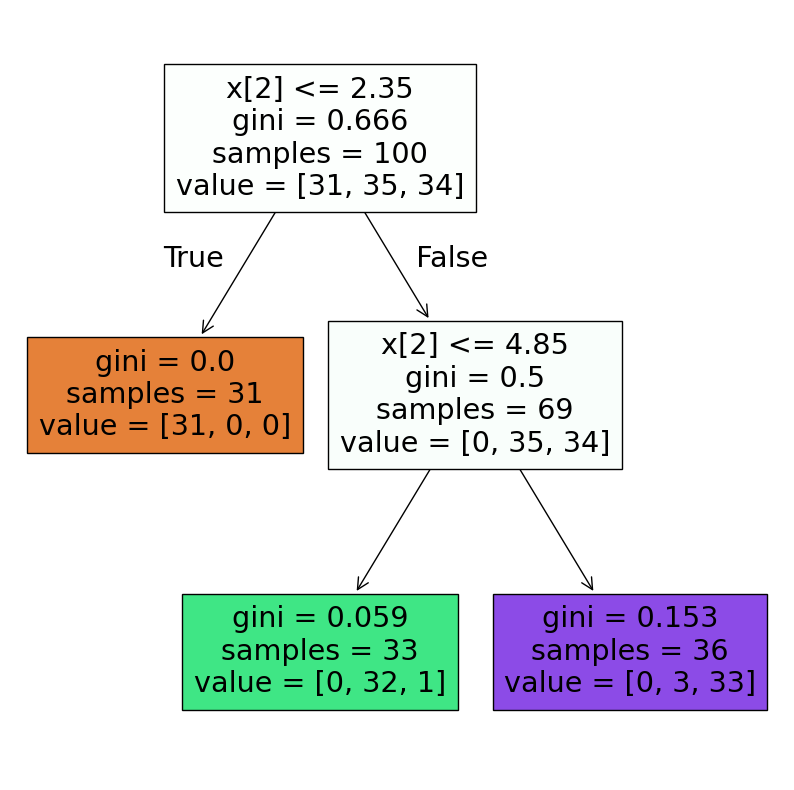

In [45]:
plt.figure(figsize=(10,10))
tree.plot_tree(model , filled=True)

In [48]:
y_pred=model.predict(x_test)


In [49]:
y_pred

array([2, 2, 1, 0, 2, 1, 0, 2, 0, 1, 1, 0, 2, 0, 0, 1, 1, 1, 2, 0, 2, 0,
       0, 0, 2, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0, 0, 1, 1, 1, 2, 2, 0, 1, 0,
       1, 2, 1, 2, 0, 1])

In [50]:
y_test

array([2, 2, 1, 0, 2, 1, 0, 2, 0, 1, 1, 0, 2, 0, 0, 2, 1, 1, 2, 0, 2, 0,
       0, 0, 2, 0, 0, 2, 1, 1, 0, 1, 0, 2, 0, 0, 1, 1, 1, 2, 2, 0, 1, 0,
       1, 2, 2, 2, 0, 1])

In [51]:
from sklearn.metrics import  accuracy_score , classification_report

In [52]:
score=accuracy_score(y_test, y_pred)

In [53]:
score

0.94

In [54]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.83      0.91        18
           2       0.81      1.00      0.90        13

    accuracy                           0.94        50
   macro avg       0.94      0.94      0.94        50
weighted avg       0.95      0.94      0.94        50



In [55]:
# pre pruning

import warnings
warnings.filterwarnings('ignore')

In [58]:
parameter={'criterion':['gini', 'entropy' , 'log_loss'], 'splitter':['best','random'],
           'max_depth':[1,2,3,4,5],  'max_features':['auto' , 'sqrt' , 'log2']}

In [61]:
from sklearn.model_selection import  GridSearchCV


In [62]:
model= DecisionTreeClassifier()
clf=GridSearchCV(model ,param_grid=parameter, cv=5, scoring='accuracy')
clf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [71]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [72]:
y_predd=clf.predict(x_test)
y_pred

array([2, 2, 1, 0, 2, 1, 0, 2, 0, 1, 1, 0, 2, 0, 0, 1, 1, 1, 2, 0, 2, 0,
       0, 0, 2, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0, 0, 1, 1, 1, 2, 2, 0, 1, 0,
       1, 2, 1, 2, 0, 1])

In [73]:
scorre=accuracy_score(y_test, y_predd)

In [75]:
scorre

0.94

In [76]:
print(classification_report(y_predd, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.83      0.91        18
           2       0.81      1.00      0.90        13

    accuracy                           0.94        50
   macro avg       0.94      0.94      0.94        50
weighted avg       0.95      0.94      0.94        50

